In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
day_total = tips.groupby('day', as_index=False)['total_bill'].sum()
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


Text(0, 0.5, 'Total Bill')

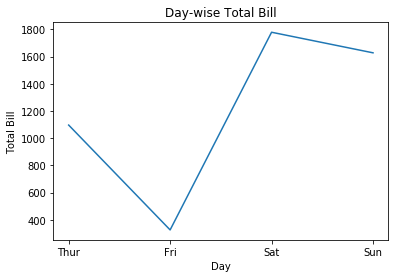

In [4]:
plt.plot(day_total['day'], day_total['total_bill'])
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")

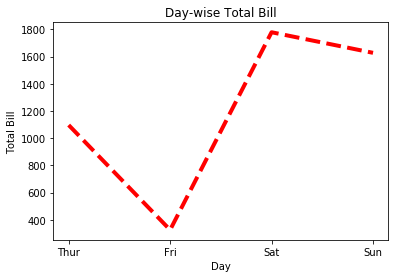

In [6]:
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.plot(day_total['day'], day_total['total_bill'],color='red', linestyle='dashed',  linewidth=4)

Text(0, 0.5, 'Total Bill')

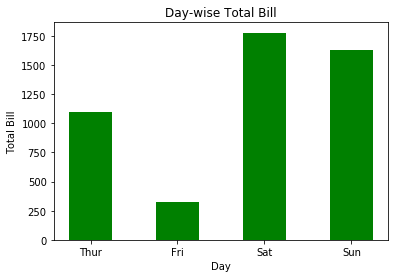

In [10]:
plt.bar(day_total['day'], day_total['total_bill'], color='green', width=0.5)
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")

Text(0.5, 1.0, 'Day-wise Total Bill')

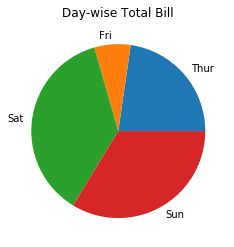

In [11]:
plt.pie(day_total['total_bill'], labels = day_total['day'])
plt.title("Day-wise Total Bill")

Text(0.5, 1.0, 'Day-wise Total Bill')

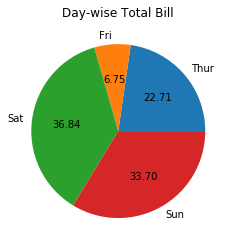

In [12]:
plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f")
plt.title("Day-wise Total Bill")

Text(0.5, 1.0, 'Day-wise Total Bill')

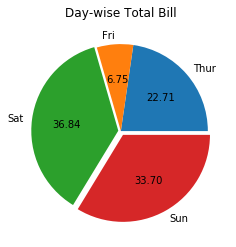

In [14]:
plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f", explode = (0,0,.03,0.05))
plt.title("Day-wise Total Bill")

Text(0, 0.5, 'Tip')

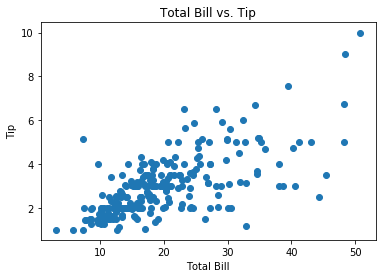

In [17]:
plt.scatter( tips['total_bill'], tips['tip'])
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
# plt.xlim((0,80))  # X Scale 
# plt.ylim((0,15))

Text(0, 0.5, 'Size')

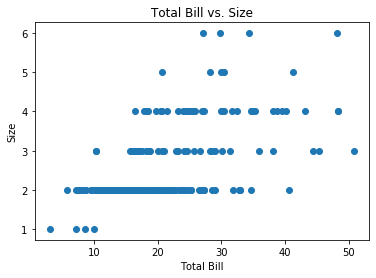

In [18]:
plt.scatter( tips['total_bill'], tips['size'])
plt.title("Total Bill vs. Size")
plt.xlabel("Total Bill")
plt.ylabel("Size")

Text(0.5, 1.0, 'Total Bill')

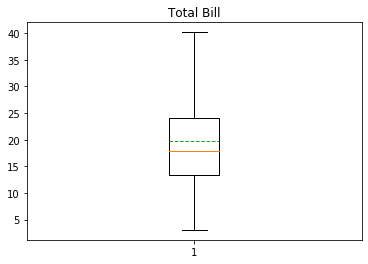

In [23]:
plt.boxplot(tips['total_bill'], showfliers=False, showmeans=True, meanline=True)
plt.title("Total Bill")

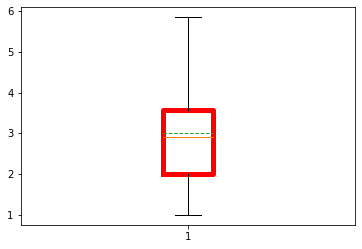

In [38]:
prop = { 'color':'red', 'linewidth' : 5}
ax = plt.boxplot(tips['tip'], showfliers=False, showmeans=True, meanline=True, boxprops=prop)

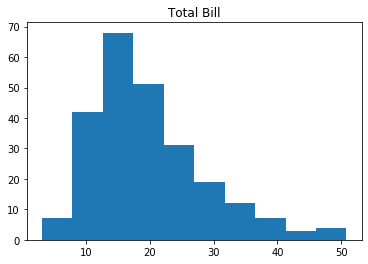

In [37]:
plt.title("Total Bill")
ax = plt.hist(tips['total_bill'])

Text(0.5, 1.0, 'Total Bill')

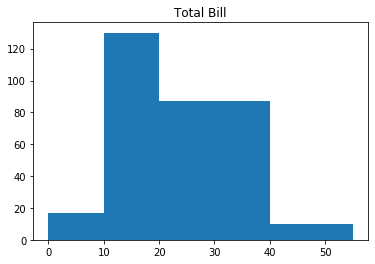

In [27]:
plt.hist(tips['total_bill'], bins=[0,10,20,40,55])
plt.title("Total Bill")

## Object API

<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0, 0.5, 'Total Bill')

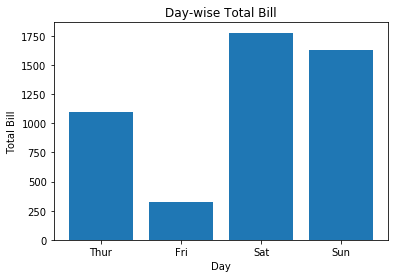

In [28]:
ax = plt.subplot()
print(type(ax))
ax.bar(day_total['day'], day_total['total_bill'])
ax.set_title("Day-wise Total Bill")
ax.set_xlabel("Day")
ax.set_ylabel("Total Bill")

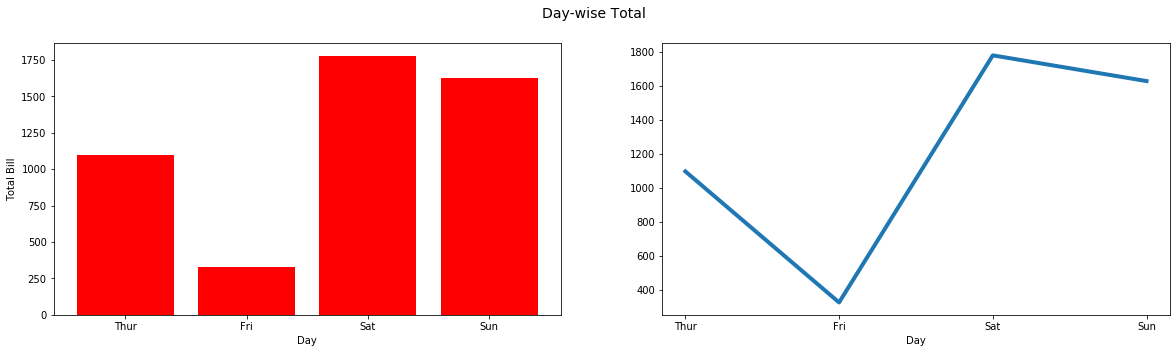

In [33]:
fig,ax = plt.subplots(1,2)
fig.suptitle('Day-wise Total', fontsize=14)
fig.set_size_inches(20,5)
ax[0].bar(day_total['day'], day_total['total_bill'], color='red')
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total Bill")

ax[1].plot(day_total['day'], day_total['total_bill'], linewidth=4)
ax[1].set_xlabel("Day")
fig.savefig("day_total.jpg")

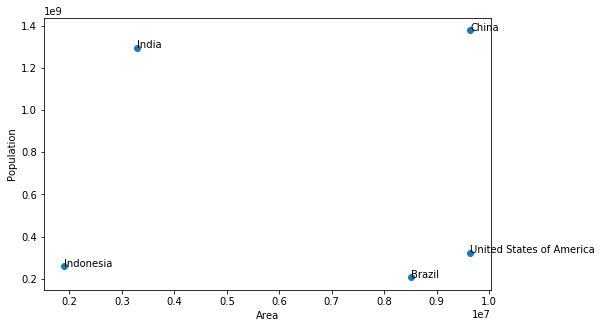

In [7]:
countries = pd.read_json("https://restcountries.eu/rest/v2/all")
# Take only top 5 countries by population
tc = countries.sort_values (by='population', ascending=False).head(5)[['population','area','alpha3Code','name']]
plt.scatter(x = tc ['area'], y = tc ['population'])
plt.gcf().set_size_inches (8,5) # gcf () get current figure and change its size     
plt.xlabel("Area")
plt.ylabel("Population")

# set labels for dots
for i in tc.index:
     plt.annotate(tc.loc[i,'name'],xy=(tc.loc[i,'area'],tc.loc[i,'population']))

In [11]:
# smoker_total  = pd.crosstab(tips['day'], tips['smoker'], tips['total_bill'], aggfunc=sum)
smoker_total  = tips.pivot_table(index='day', columns='smoker',values= 'total_bill',aggfunc=sum)

In [10]:
smoker_total

smoker,Yes,No
day,,
Thur,326.24,770.09
Fri,252.20,73.68
Sat,893.62,884.78
Sun,458.28,1168.88


### Stacked bar

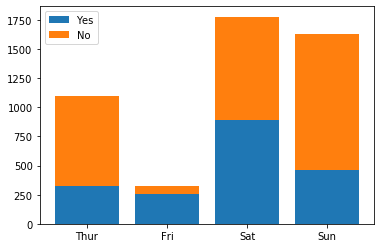

In [12]:
ax = plt.subplot()
ax.bar(smoker_total.index , height=smoker_total['Yes'])
ax.bar(smoker_total.index , height=smoker_total['No'],bottom = smoker_total["Yes"])
ax.legend(smoker_total.columns)

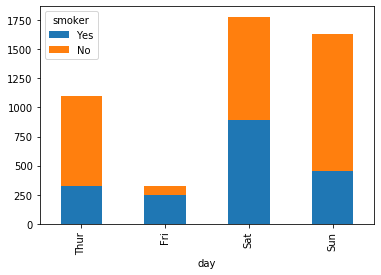

In [17]:
smoker_total.plot.bar(stacked=True)

### Multi-bar Graph

Text(0.5, 1.0, 'Total Bill Per Day for Smokers and Non-Smokers')

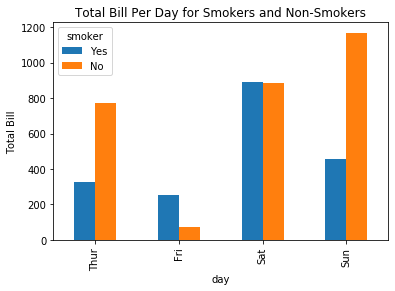

In [16]:
ax = smoker_total.plot.bar()
ax.set_ylabel('Total Bill')
ax.set_title('Total Bill Per Day for Smokers and Non-Smokers')

In [18]:
totals  = pd.crosstab(tips['sex'], tips['day'], tips['total_bill'], aggfunc=sum)

In [30]:
totals

day,Thur,Fri,Sat,Sun
sex,,,,
Male,561.44,198.57,1227.35,1269.46
Female,534.89,127.31,551.05,357.70


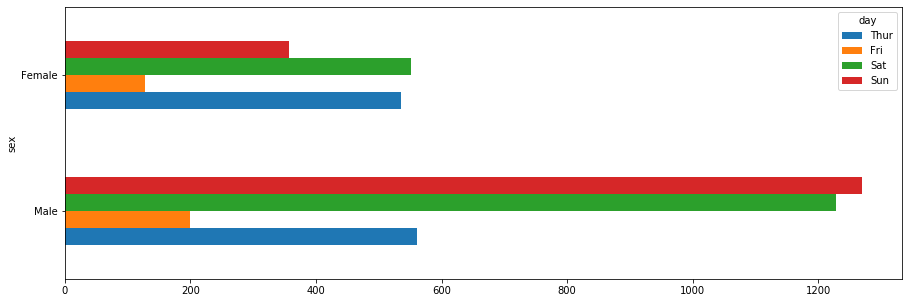

In [22]:
totals.plot(kind='barh', figsize=(15,5))

### Line Graph

In [23]:
male = tips.loc[ tips['sex'] == 'Male'].groupby('day')['total_bill'].sum()
female  = tips.loc[ tips['sex'] == 'Female'].groupby('day')['total_bill'].sum()

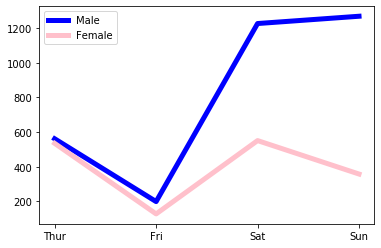

In [26]:
plt.plot(male, color='blue',linewidth=5)
plt.plot(female, color='pink', linewidth=5)
plt.legend(['Male','Female'])

### Histogram

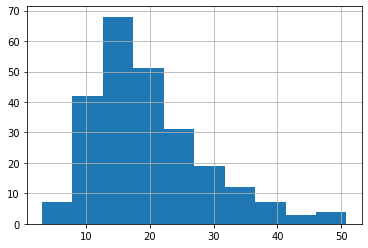

In [28]:
tips['total_bill'].hist()

Text(0.5, 1.0, 'Table Size')

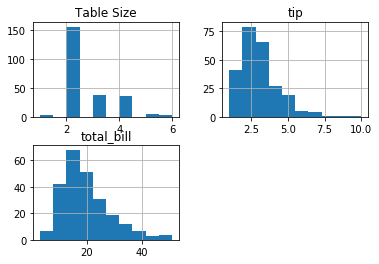

In [33]:
ax = tips.hist()
ax[0,0].set_title("Table Size")

In [37]:
countries['region'].value_counts()

Africa      60
Americas    57
Europe      53
Asia        50
Oceania     27
             2
Polar        1
Name: region, dtype: int64

In [39]:
asia = countries.loc[countries.region == 'Asia', ['name', 'population']].sort_values('population',ascending=False).head(10)

In [40]:
asia

,name,population
48,China,1377422166
104,India,1295210000
105,Indonesia,258705000
169,Pakistan,194125062
18,Bangladesh,161006790
114,Japan,126960000
176,Philippines,103279800
244,Viet Nam,92700000
107,Iran (Islamic Republic of),79369900
231,Turkey,78741053


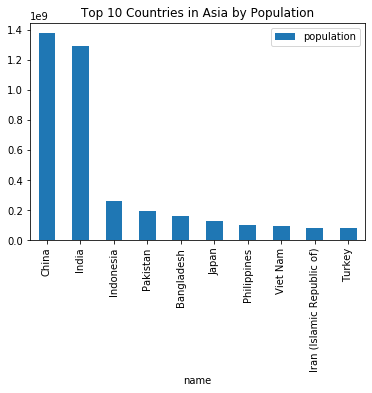

In [56]:
asia.plot.bar(x = 'name',y = 'population', title='Top 10 Countries in Asia by Population')

Text(0, 0.5, 'Population')

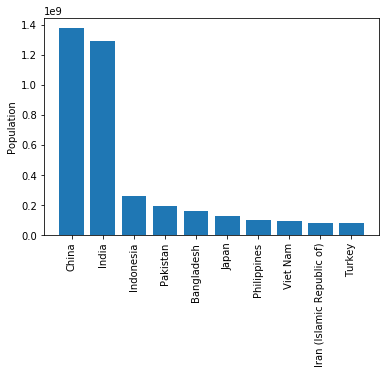

In [55]:
plt.bar(x=asia.name, height=asia.population)
plt.xticks(asia.name, asia.name, rotation = 'vertical')
plt.ylabel("Population")

### Interactive Mode

In [58]:
plt.isinteractive()

True

Text(0.5, 0.5, 'Hello')

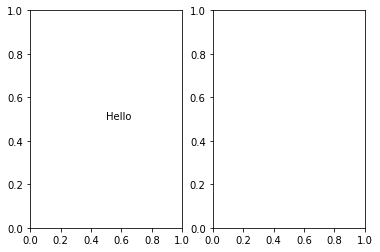

In [61]:
fig, ax = plt.subplots(1,2)
ax[0].text(.5,.5,'Hello')